In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

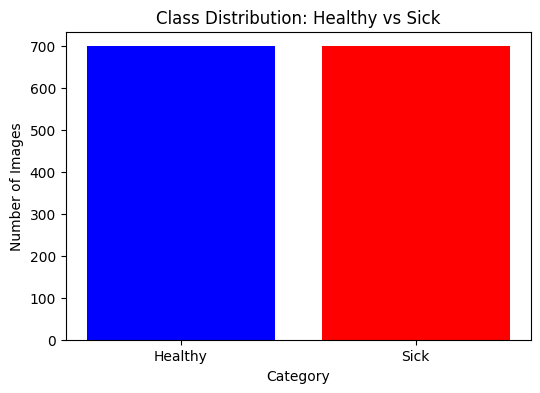

In [ ]:
train_dir = '/content/drive/MyDrive/Cancer/train'
categories = ['Healthy', 'Sick']

image_counts = {}
image_sizes = []
avg_color = {"Healthy": [], "Sick": []}

for category in categories:
    folder_path = os.path.join(train_dir, category)
    image_counts[category] = len(os.listdir(folder_path))
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        with Image.open(img_path) as img:
            image_sizes.append(img.size)
            img_array = np.array(img) / 255.0
            avg_color[category].append(img_array.mean(axis=(0, 1)))

plt.figure(figsize=(6, 4))
plt.bar(image_counts.keys(), image_counts.values(), color=['blue', 'red'])
plt.xlabel("Category")
plt.ylabel("Number of Images")
plt.title("Class Distribution: Healthy vs Sick")
plt.show()


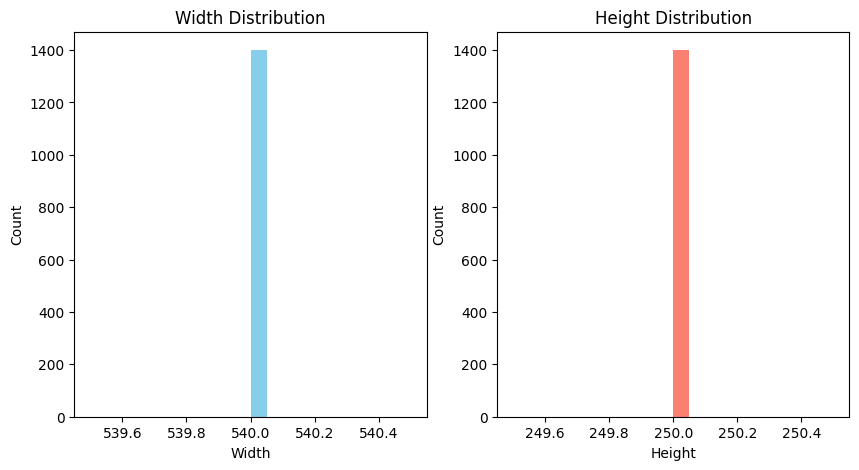

In [ ]:
width, height = zip(*image_sizes)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(width, bins=20, color='skyblue')
plt.title('Width Distribution')
plt.xlabel('Width')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(height, bins=20, color='salmon')
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

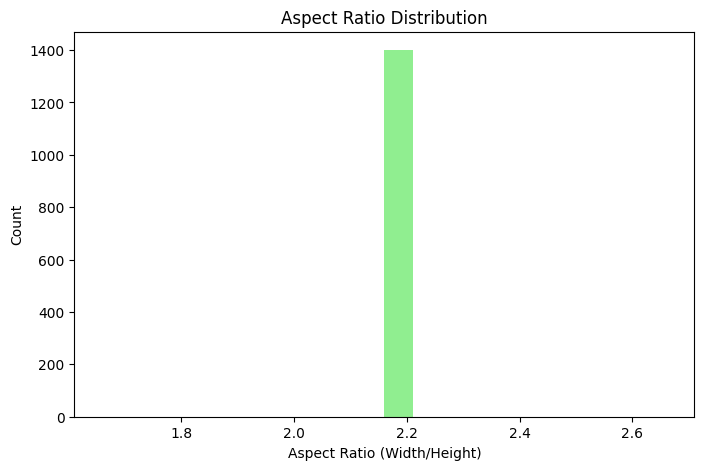

In [ ]:
aspect_ratios = [w / h for w, h in image_sizes]
plt.figure(figsize=(8, 5))
plt.hist(aspect_ratios, bins=20, color='lightgreen')
plt.title('Aspect Ratio Distribution')
plt.xlabel('Aspect Ratio (Width/Height)')
plt.ylabel('Count')
plt.show()

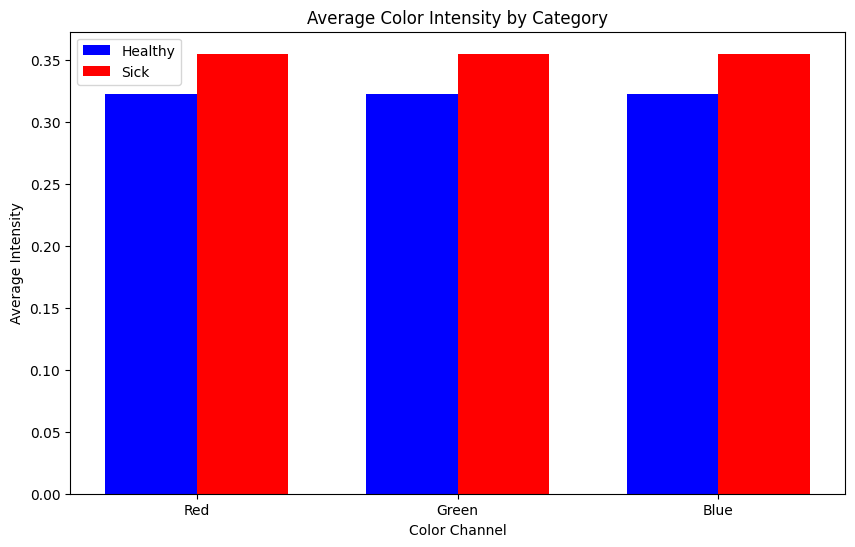

In [ ]:
healthy_colors = np.mean(avg_color["Healthy"], axis=0)
sick_colors = np.mean(avg_color["Sick"], axis=0)

bar_width = 0.35
index = np.arange(3)
plt.figure(figsize=(10, 6))
plt.bar(index, healthy_colors, bar_width, label="Healthy", color='blue')
plt.bar(index + bar_width, sick_colors, bar_width, label="Sick", color='red')
plt.xlabel("Color Channel")
plt.ylabel("Average Intensity")
plt.title("Average Color Intensity by Category")
plt.xticks(index + bar_width / 2, ["Red", "Green", "Blue"])
plt.legend()
plt.show()

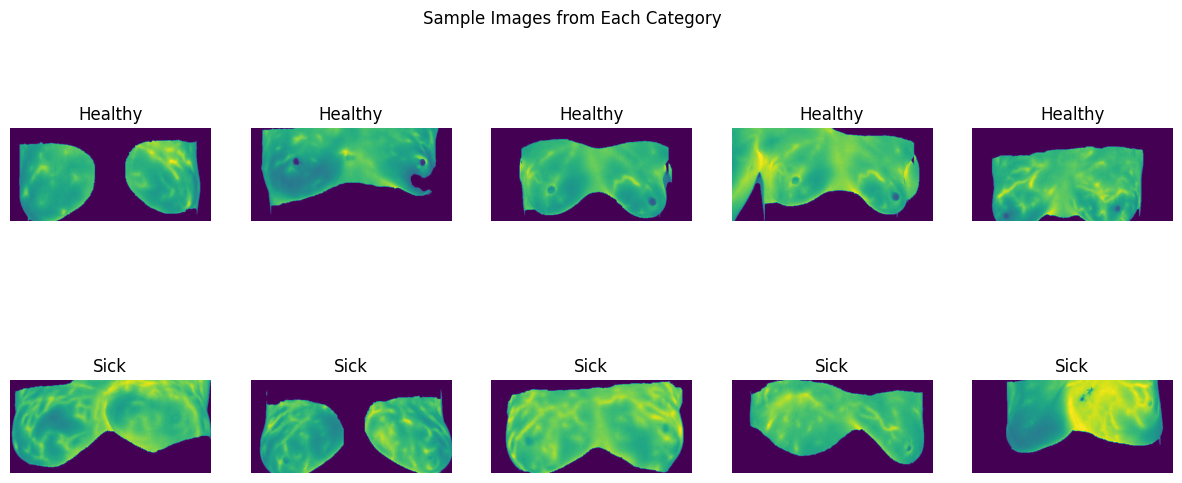

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for idx, category in enumerate(categories):
    folder_path = os.path.join(train_dir, category)
    sample_files = np.random.choice(os.listdir(folder_path), 5)
    for i, img_file in enumerate(sample_files):
        img_path = os.path.join(folder_path, img_file)
        img = Image.open(img_path)
        axs[idx, i].imshow(img)
        axs[idx, i].set_title(category)
        axs[idx, i].axis('off')
plt.suptitle("Sample Images from Each Category")
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    brightness_range=(0.8, 1.2),
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=16,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=16,
    class_mode='binary',
    subset='validation'
)

Found 1120 images belonging to 2 classes.
Found 280 images belonging to 2 classes.


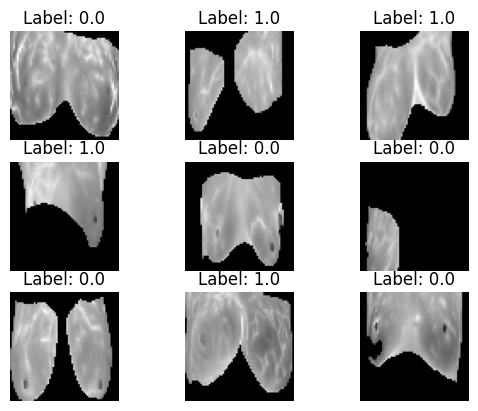

In [ ]:
x_batch, y_batch = next(train_generator)
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.title(f'Label: {y_batch[i]}')
    plt.axis('off')
plt.show()

Epoch 1/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 16s 196ms/step - accuracy: 0.5233 - loss: 0.9994 - val_accuracy: 0.5000 - val_loss: 0.8396
Epoch 2/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 20s 180ms/step - accuracy: 0.5379 - loss: 0.8153 - val_accuracy: 0.4500 - val_loss: 0.7784
Epoch 3/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 14s 191ms/step - accuracy: 0.5769 - loss: 0.7517 - val_accuracy: 0.6821 - val_loss: 0.7637
Epoch 4/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 19s 172ms/step - accuracy: 0.6315 - loss: 0.7126 - val_accuracy: 0.5536 - val_loss: 0.8086
Epoch 5/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 165ms/step - accuracy: 0.7516 - loss: 0.5808 - val_accuracy: 0.4821 - val_loss: 0.9421
Epoch 6/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 14s 188ms/step - accuracy: 0.7602 - loss: 0.5628 - val_accuracy: 0.5143 - val_loss: 1.2691
Epoch 7/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 14s 191ms/step - accuracy: 0.8143 - loss: 0.4884 - val_accuracy: 0.4143 - val_loss: 1.2211
Epoch 8/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 20s 181ms/step - accuracy: 0.8435 - loss: 0.4578 - val_accu

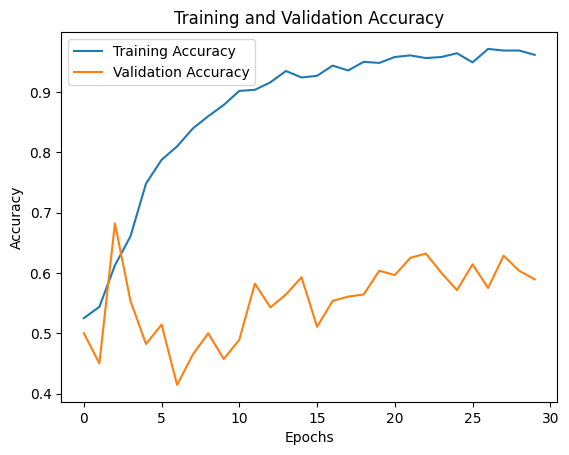

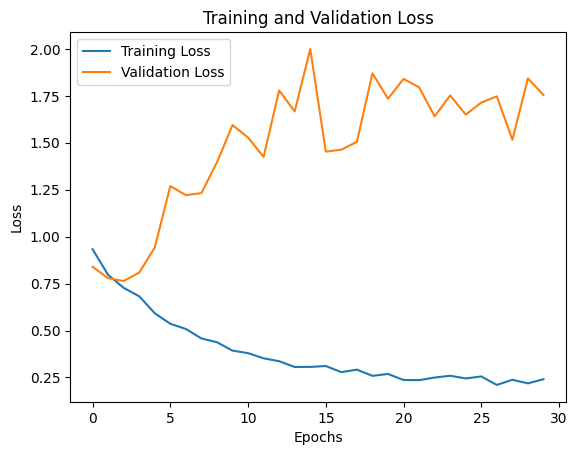

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3), kernel_regularizer=regularizers.l2(0.001)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

metrics=['accuracy']

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

history = model.fit(
    train_generator,
    epochs=30,  # Start with fewer epochs
    validation_data=validation_generator,
    callbacks=[checkpoint]
)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

val_generator.reset()
y_true = val_generator.classes
y_pred = np.round(model.predict(val_generator))

print(classification_report(y_true, y_pred, target_names=categories))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

NameError: name 'val_generator' is not defined